# Goal: investigate code distance required to tolerate ray impact

In [14]:
import sys
sys.path.append('../')

import sinter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import multiprocess as mp

from stim_surface_code.memory import MemoryPatch
from stim_surface_code.stability import StabilityPatch
from stim_lattice_surgery.lattice_surgery.single_error_metric import initialize_ops, get_processed_error_data
from stim_lattice_surgery.lattice_surgery.zxxz_patch import ZXXZPatch
from stim_lattice_surgery.lattice_surgery.glue import GluePatch, BoundaryType
from stim_lattice_surgery.lattice_surgery.surgery_op import SurgeryOp
from ray_delay.noise_model import NoiseModel, GoogleNoiseParamsNoRandomRays
from ray_delay.noise_model_patch import NoiseModelPatch

TODO: what about multiple rays? should we assume that you just add the added
distance again?

# Surface code memory experiment

In [15]:
generate_data = True

In [3]:
if generate_data:
    radii_mem = [0,1,3,5,7]
    d_range_mem = [7,9,11,13,15]
    strengths_mem = [0.9, 0.99, 0.999]

    tasks = []
    for strength in strengths_mem:
        for d in d_range_mem:
            for r in radii_mem:
                noise_params = GoogleNoiseParamsNoRandomRays.improve(10)
                noise_params.cosmic_ray_params.max_strength = strength
                _patch = MemoryPatch(d, d, d)
                nmp = NoiseModelPatch(_patch, noise_params=noise_params)
                if r > 0:
                    nmp.force_cosmic_ray_by_coords((d//2, d//2), r)
                tasks.append(nmp.patch.get_sinter_task({'json_metadata':{'d':d, 'r':r, 'strength':strength}}))
    
    collected_results_memory = sinter.collect(
        tasks=tasks,
        num_workers=6,
        decoders=['pymatching'],
        max_shots=10**7,
        max_errors=1000,
    )

    with open('data/code_expansion_distance_memory.pkl', 'wb') as f:
        pickle.dump({
            'radii': radii_mem,
            'distances': d_range_mem,
            'strengths': strengths_mem,
            'sinter_results': collected_results_memory,
        }, f)
else:
    with open('data/code_expansion_distance_memory.pkl', 'rb') as f:
        data = pickle.load(f)
        radii_mem = data['radii']
        d_range_mem = data['distances']
        strengths_mem = data['strengths']
        collected_results_memory = data['sinter_results']

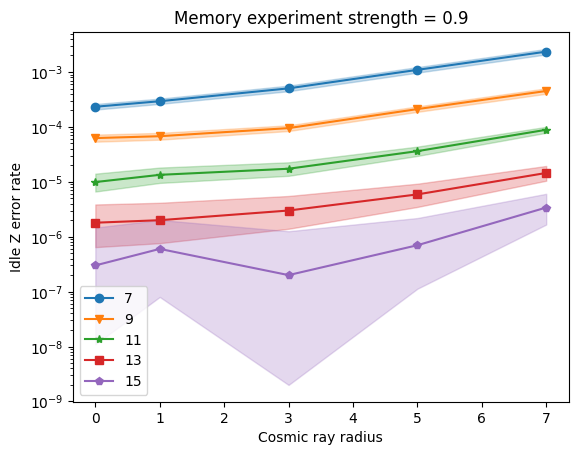

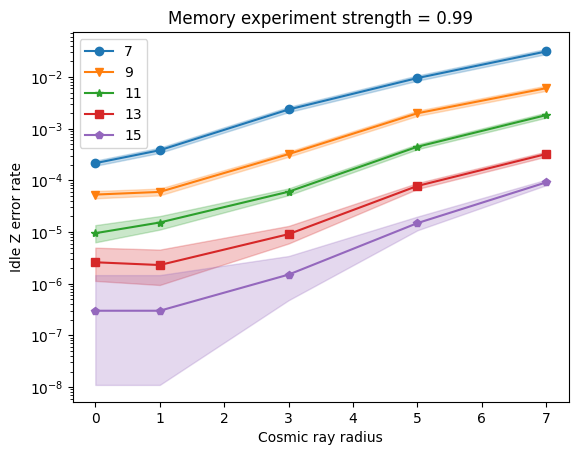

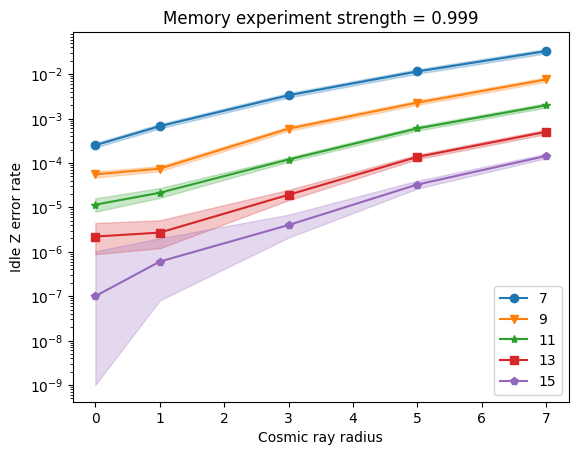

In [14]:
sinter.plot_error_rate(ax=plt.gca(), stats=collected_results_memory, x_func=lambda x: x.json_metadata['r'], group_func=lambda x: x.json_metadata['d'], filter_func=lambda x: x.json_metadata['strength'] == 0.9)
plt.yscale('log')
plt.ylabel('Idle Z error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Memory experiment strength = 0.9')
plt.legend()
plt.show()

sinter.plot_error_rate(ax=plt.gca(), stats=collected_results_memory, x_func=lambda x: x.json_metadata['r'], group_func=lambda x: x.json_metadata['d'], filter_func=lambda x: x.json_metadata['strength'] == 0.99)
plt.yscale('log')
plt.ylabel('Idle Z error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Memory experiment strength = 0.99')
plt.legend()
plt.show()

sinter.plot_error_rate(ax=plt.gca(), stats=collected_results_memory, x_func=lambda x: x.json_metadata['r'], group_func=lambda x: x.json_metadata['d'], filter_func=lambda x: x.json_metadata['strength'] == 0.999)
plt.yscale('log')
plt.ylabel('Idle Z error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Memory experiment strength = 0.999')
plt.legend()
plt.show()

In [16]:
if generate_data:
    radii_stab = [0,1,3,5,7]
    d_range_stab = [4,6,8,10]
    strengths_stab = [0.9, 0.99, 0.999]

    tasks = []
    for strength in strengths_stab:
        for d in d_range_stab:
            for r in radii_stab:
                noise_params = GoogleNoiseParamsNoRandomRays.improve(10)
                noise_params.cosmic_ray_params.max_strength = strength
                _patch = StabilityPatch(d, d, d)
                nmp = NoiseModelPatch(_patch, noise_params=noise_params)
                if r > 0:
                    nmp.force_cosmic_ray_by_coords((d//2, d//2), r)
                tasks.append(nmp.patch.get_sinter_task({'json_metadata':{'d':d, 'r':r, 'strength':strength}}))
    
    collected_results_stability = sinter.collect(
        tasks=tasks,
        num_workers=6,
        decoders=['pymatching'],
        max_shots=10**7,
        max_errors=1000,
    )

    with open('data/code_expansion_distance_stability.pkl', 'wb') as f:
        pickle.dump({
            'radii': radii_stab,
            'distances': d_range_stab,
            'strengths': strengths_stab,
            'sinter_results': collected_results_stability,
        }, f)
else:
    with open('data/code_expansion_distance_stability.pkl', 'rb') as f:
        data = pickle.load(f)
        radii_stab = data['radii']
        d_range_stab = data['distances']
        strengths_stab = data['strengths']
        collected_results_stability = data['sinter_results']

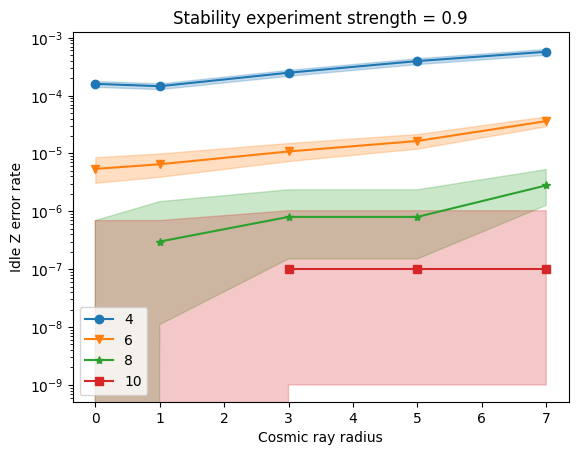

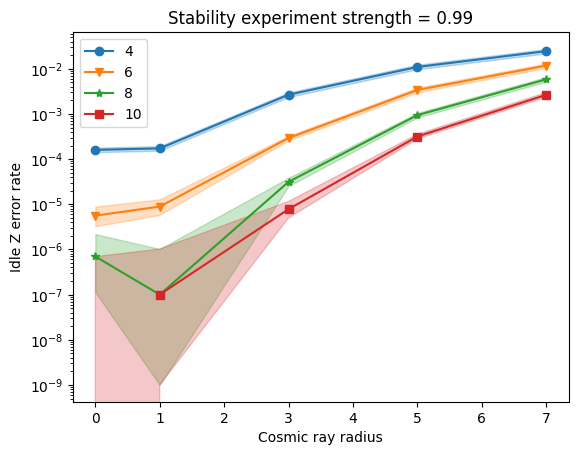

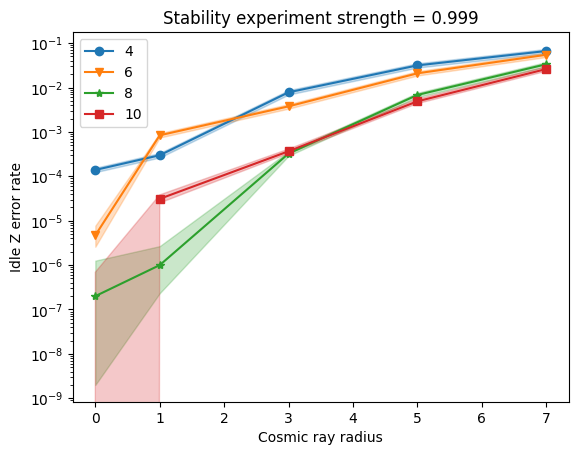

In [18]:
sinter.plot_error_rate(ax=plt.gca(), stats=collected_results_stability, x_func=lambda x: x.json_metadata['r'], group_func=lambda x: x.json_metadata['d'], filter_func=lambda x: x.json_metadata['strength'] == 0.9)
plt.yscale('log')
plt.ylabel('Idle Z error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Stability experiment strength = 0.9')
plt.legend()
plt.show()

sinter.plot_error_rate(ax=plt.gca(), stats=collected_results_stability, x_func=lambda x: x.json_metadata['r'], group_func=lambda x: x.json_metadata['d'], filter_func=lambda x: x.json_metadata['strength'] == 0.99)
plt.yscale('log')
plt.ylabel('Idle Z error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Stability experiment strength = 0.99')
plt.legend()
plt.show()

sinter.plot_error_rate(ax=plt.gca(), stats=collected_results_stability, x_func=lambda x: x.json_metadata['r'], group_func=lambda x: x.json_metadata['d'], filter_func=lambda x: x.json_metadata['strength'] == 0.999)
plt.yscale('log')
plt.ylabel('Idle Z error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Stability experiment strength = 0.999')
plt.legend()
plt.show()

Do line fit to each line, then find where each one intersects baseline (radius =
0) error rate value. This will make a new plot with radius on the x axis and
   distance on the y axis, with a point for each intersection

In [2]:
baseline_d = 7
# radii = np.arange(1,8).astype(float)
# d_range = [7,9,11,13,15,17,19]

radii = [1,3,5,7]
d_range = [7,9,11,13]

In [3]:
op_list = initialize_ops(d_range)

In [4]:

# TODO: find center qubit coords and force ray
op_list[0].patch_collection

----------------------------------------------------------------------------
|    |    |X146|    |    |    |X147|    |    |    |X148|    |    |    |    |
----------+----+--------------+----+--------------+----+--------------------
|    |  97|    |  98|    |  99|    | 100|    | 101|    | 102|    | 103|    |
----------+----+----+----+----+----+----+----+----+----+----+----+----+-----
|    |    |Z149|    |X150|    |Z151|    |X152|    |Z153|    |X154|    |Z155|
----------+----+----+----+----+----+----+----+----+----+----+----+----+-----
|    | 104|    | 105|    | 106|    | 107|    | 108|    | 109|    | 110|    |
-----+----+----+----+----+----+----+----+----+----+----+----+----+----------
|Z156|    |X157|    |Z158|    |X159|    |Z160|    |X161|    |Z162|    |    |
-----+----+----+----+----+----+----+----+----+----+----+----+----+----------
|    | 111|    | 112|    | 113|    | 114|    | 115|    | 116|    | 117|    |
----------+----+----+----+----+----+----+----+----+----+----+----+----+-----

In [5]:
op_list[0].patch_collection.device[2*7+1][7]

197, Coords: (15, 7)

In [6]:
len(op_list[0].patch_collection.device)//2

15

In [8]:
results = []
for radius in radii:
    op_list = []
    nmps = []
    for d in d_range:
        patch1 = ZXXZPatch(d, d, d, id_offset=0)
        patch2 = ZXXZPatch(d, d, d, id_offset=2*d**2 - 1)
        op = SurgeryOp([patch1, patch2], [], [(patch1, BoundaryType.TOP, patch2, BoundaryType.BOTTOM, 4*d**2 - 2)])

        noise_params = GoogleNoiseParamsNoRandomRays.improve(10)
        noise_params.cosmic_ray_params.max_strength = 0.99
        nmp = NoiseModelPatch(op.patch_collection, noise_params, seed=0)
        if radius > 0:
            nmp.force_cosmic_ray_by_coords((len(op.patch_collection.device[0])//2, len(op.patch_collection.device)//2), radius)
        op_list.append(op)
        nmps.append(nmp)
    results.append(get_processed_error_data(d_range, op_list=[[data] for data in zip(op_list, nmps)]))

Running 8 circuits
Running 8 circuits
Running 8 circuits
Running 8 circuits


In [19]:
processed_data = np.zeros((len(radii), len(d_range)))
for i,subresult in enumerate(results):
    for (d,radius_idx),result in subresult[0].items():
        print(result)
        processed_data[i+radius_idx, d_range.index(d)] = result['error_rate']

{'tl': {'obs_mistake_mask=E_E': 0.00011805227632565761, 'obs_mistake_mask=_E_': 0.00035415682897697284, 'obs_mistake_mask=E__': 0.00022916030110274715, 'obs_mistake_mask=_EE': 2.777700619427238e-05}, 'zl': {'obs_mistake_mask=E': 0.0013717421124828531}, 'tl_err_rate': 0.00036110108052554094, 'zl_err_rate': 0.0013717421124828531, 'error_rate': 0.001732347855449401}
{'tl': {'obs_mistake_mask=E__': 5.225608783423269e-05, 'obs_mistake_mask=_E_': 8.525993278216912e-05, 'obs_mistake_mask=E_E': 1.6501922473968218e-05, 'obs_mistake_mask=_EE': 1.375160206164018e-06}, 'zl': {'obs_mistake_mask=E': 0.00025881013218139294}, 'tl_err_rate': 6.944559041128292e-05, 'zl_err_rate': 0.00025881013218139294, 'error_rate': 0.00032823774937029704}
{'tl': {'obs_mistake_mask=_E_': 1.2944969854401452e-05, 'obs_mistake_mask=E__': 1.1003224376241234e-05, 'obs_mistake_mask=E_E': 1.5102464830135027e-06}, 'zl': {'obs_mistake_mask=E': 5.17710258885583e-05}, 'tl_err_rate': 1.2513470859254736e-05, 'zl_err_rate': 5.177102

In [10]:
processed_data

array([[1.73234786e-03, 3.28237749e-04, 6.42838489e-05, 1.33572077e-05],
       [2.51398829e-03, 4.47519401e-04, 7.00672953e-05, 1.30326209e-05],
       [4.02096398e-03, 6.59780831e-04, 1.15188532e-04, 1.79484954e-05],
       [1.10799202e-02, 1.38599231e-03, 2.29387591e-04, 2.76179067e-05]])

Text(0.5, 1.0, 'Lattice surgery experiment')

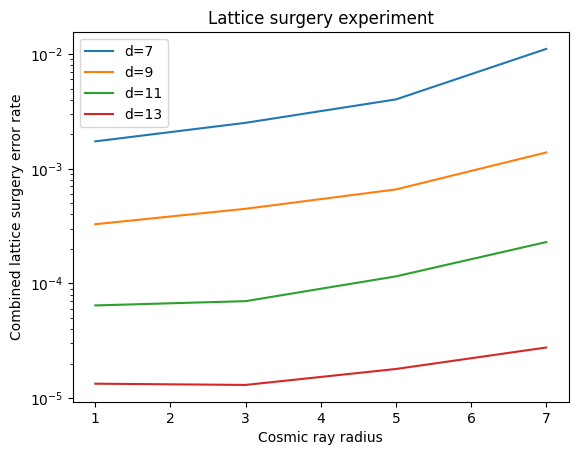

In [11]:
for col in range(processed_data.shape[1]):
    d = d_range[col]
    plt.plot(radii, processed_data[:,col], label=f'd={d}')
plt.legend()
plt.yscale('log')
plt.ylabel('Combined lattice surgery error rate')
plt.xlabel('Cosmic ray radius')
plt.title('Lattice surgery experiment')

In [30]:
results[0][0][(11,0)]['error_rate']

7.033207321327506e-05

In [17]:
results[1][0][(11,0)]['error_rate']

0.00034887576882025595

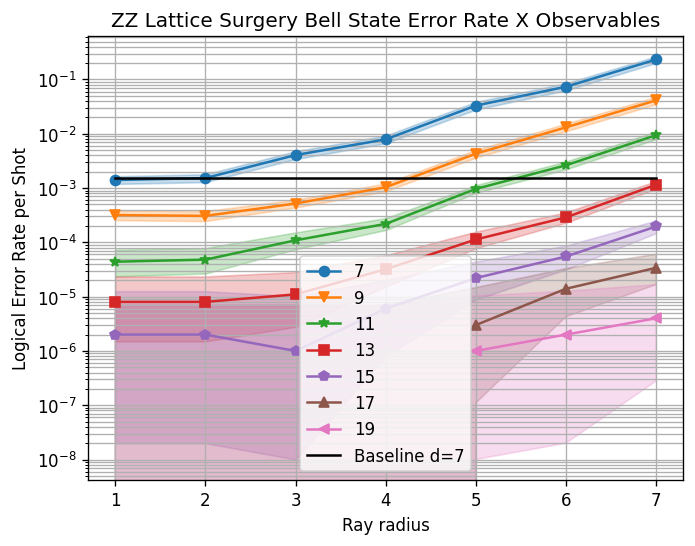

In [43]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=samples,
    x_func=lambda stats: stats.json_metadata['r'],
    group_func=lambda stats: stats.json_metadata['d'],
)
ax.set_yscale('log')
ax.set_title(f"ZZ Lattice Surgery Bell State Error Rate {observable_basis} Observables")
ax.set_xlabel("Ray radius")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')

ax.plot(radii, [result[0].errors / result[0].shots for _ in radii], label='Baseline d=7', color='black')

ax.legend()
fig.set_dpi(120)  # Show it bigger